# Select M dwarfs through heuristics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
from astropy.io import fits

In [4]:
hdus = fits.open('../../data/Gaia/kepler_dr3_good.fits')

### Read in the table to a pandas dataframe

In [5]:
from astropy.table import Table

In [6]:
tab = Table()

In [7]:
for col in hdus[1].columns:
    tab[col.name] = hdus[1].data[col.name]

In [8]:
df = tab.to_pandas()

In [9]:
df.tail()

,kepid,ra_kic,dec_kic,source_id,random_index,ra,dec,parallax,parallax_error,parallax_over_error,...,mass_err2,prov_sec,nconfp,nkoi,ntce,jmag,hmag,kmag,planet?,kepler_gaia_mag_diff
196757,12984227,290.07986,52.453712,2139330189463960320,1434812375,290.079838,52.453692,0.246011,0.018616,13.214761,...,-0.484,DSEP,0,0,0,8.505,7.589,7.295,none,-0.332914
196758,12984288,290.11249,52.415588,2139329875927860736,662936371,290.112599,52.415592,0.005198,0.055361,0.093884,...,-0.157,DSEP,0,0,0,16.289,15.603,15.306,none,-0.235144
196759,12984307,290.12332,52.474621,2139330636140575616,923414311,290.123462,52.474735,1.779882,0.009830,181.061508,...,-0.375,DSEP,0,0,0,11.459,11.104,11.075,none,-0.035185
196760,12984404,290.17230,52.423828,2139329467909467008,595517067,290.172325,52.423856,0.707362,0.009949,71.101357,...,-2.250,DSEP,0,0,0,9.851,9.212,9.095,none,-0.027551
196761,12984422,290.18420,52.404362,2139329399189739392,1570613422,290.184199,52.404460,0.975763,0.024997,39.035137,...,-0.102,DSEP,0,0,0,14.314,13.814,13.747,none,-0.040604


### Criterion 1: Teff and logg cuts

In [10]:
criterion1 = df.teff < 3400

In [11]:
criterion1.sum()

989

### Criterion 2:

[]

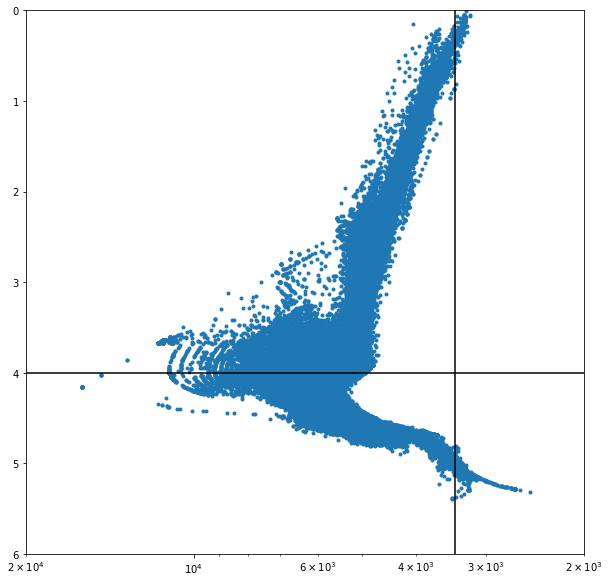

In [20]:
plt.figure(figsize=(10,10))
plt.plot(df.teff, df.logg, '.')
plt.xlim(20000, 2000)
plt.ylim(6, 0)
plt.axvline(3400, color='k')
plt.axhline(4, color='k')
plt.semilogx()

In [21]:
criterion2 = df.logg > 4.5

# 685 targets available

In [109]:
dataslice = df[criterion1 & criterion2]
sample = dataslice['kepid']

# Spot check a couple in FFIs

In [38]:
times = np.array([54945.74206,54945.8670833,54946.0182163,54946.2335259,54946.3377372,54946.5495655,
                  54946.7334679,54947.1662509,55062.8253608,55091.0055606,55123.0864583,55153.9797114,
                  55182.0366329,55215.9548927,55216.0352649,55245.7660019,55274.7398619,55307.5350333,
                  55336.4281441,55370.695297,55399.0571196,55430.8109392,55461.8291274,55492.8064711,
                  55522.7621353,55552.0843583,55585.5760016,55614.7389024,55677.4444762,55706.6440223,
                  55738.4591443,55769.477399,55801.7624176,55832.8010616,55864.8001316,55895.757043,
                  55930.8619526,55958.4268791,55986.5230115,56014.5579184,56047.5173675,56077.4525238,
                  56105.5895974,56137.5273556,56168.8315615,56203.8547584,56236.834641,56267.9141396,
                  56303.6729488,56330.563549,56357.495041,56390.4952381])

ffidata = pd.read_csv('../../data/f3/lc_data_new.out')

In [101]:
index = 123
kicid = sample.iloc[index]

Text(0.5, 1.0, '5941130')

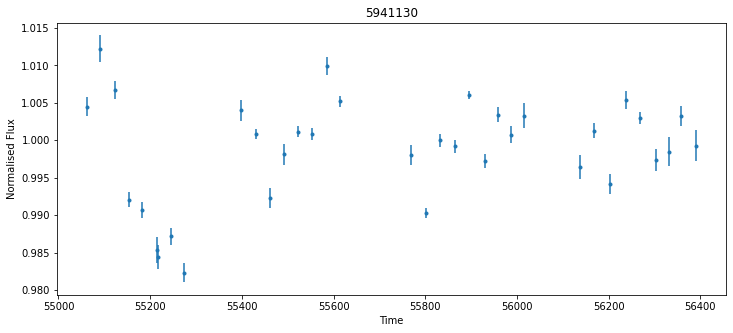

In [102]:
flux = ffidata[ffidata['KIC'] == kicid].iloc[:,1:53]
yerr = ffidata[ffidata['KIC'] == kicid].iloc[:,-52:]

plt.figure(figsize=(12,5))
plt.errorbar(times, np.asarray(flux)[0], yerr=np.asarray(yerr)[0], fmt='.')
plt.xlabel('Time')
plt.ylabel('Normalised Flux')
plt.title(kicid)

# let's get the rotation periods --- and the ones without measured rotation periods

In [125]:
rot_table = Table.read('../../data/literature/apjs492452t1_mrt.txt', format='cds').to_pandas()
no_rot_table = Table.read('../../data/literature/apjs492452t2_mrt.txt', format='cds').to_pandas()

rot_table['heritage'] = 1
no_rot_table['heritage'] = 2

In [126]:
combined_mcquillan = pd.concat([rot_table, no_rot_table], )

In [127]:
combined_mcquillan

,KIC,Teff,log(g),Mass,PRot,e_PRot,Rper,LPH,w,DC,Flag,heritage
0,892376,3813,4.47,0.4699,1.532,0.007,7306.69,0.823,0.4503,0,---,1
1,1026146,4261,4.57,0.6472,14.891,0.120,11742.56,1.405,0.7229,0,---,1
2,1026474,4122,4.56,0.5914,1.569,0.006,30471.80,1.204,0.6061,0,---,1
3,1162635,3760,4.77,0.4497,15.678,0.019,10207.47,0.978,0.5445,1,---,1
4,1164102,4045,4.62,0.5606,31.496,0.474,5139.74,0.568,0.3939,0,---,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98995,12935010,4776,4.40,0.7756,29.986,3.730,NaN,0.269,0.1523,0,NaN,2
98996,12935127,4769,4.56,0.7737,NaN,NaN,NaN,NaN,NaN,0,NaN,2
98997,12984183,5176,4.49,0.8798,24.754,1.705,NaN,0.285,0.1650,0,NaN,2
98998,12984200,5621,4.46,0.9975,NaN,NaN,NaN,NaN,NaN,0,NaN,2


In [131]:
with_prot = pd.merge(dataslice, combined_mcquillan, left_on='kepid', right_on='KIC', how='left')

In [135]:
with_prot.heritage.value_counts(dropna=False)

NaN    436
1.0    173
2.0     76
Name: heritage, dtype: int64

In [145]:
with_prot[with_prot.heritage==2].kepmag

3      15.993
5      15.942
11     14.855
20     15.725
28     15.358
        ...  
666    14.722
669    15.109
674    15.116
675    14.769
678    14.574
Name: kepmag, Length: 76, dtype: float64